In [1]:
# 1 Initialization
import numpy as np
import scipy.integrate as integrate
import skimage
import matplotlib.pyplot as plt
import matplotlib.colors as c
import os
import mpmath
from astropy.io import fits
from datetime import datetime
from astropy.convolution import Gaussian2DKernel
from astropy.convolution import convolve
from IPython.display import clear_output
import sympy as sp

In [2]:
hdul = fits.open("hst_06761_02_wfpc2_f547m_wf_drz.fits")
data = hdul[1].data

115


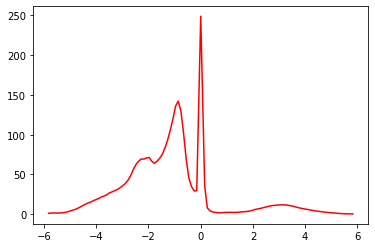

In [3]:
y_array = skimage.measure.profile_line(data[920 : 1030, 1400 : 1525], [18, 20], [100, 100], linewidth = 3)
x_array = np.linspace((len(y_array) - 1) / 2 *  0.1013, -(len(y_array) - 1) / 2 *  0.1013, len(y_array))
y_array = np.delete(y_array, 57)
y_array = np.delete(y_array, 57)
x_array = np.delete(x_array, 57)
x_array = np.delete(x_array, 57)
y_array = np.insert(y_array, 57, data[980, 1459])
x_array = np.insert(x_array, 57, 0)
plt.plot(x_array, y_array, color = 'red')
print(len(y_array))

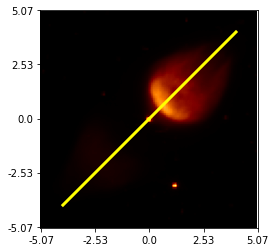

In [4]:
plt.imshow(data[980 - 50 : 980 + 50, 1459 - 50 : 1459 + 50], cmap = 'afmhot', origin = 'lower')
plt.plot([10, 90], [10, 90], color = 'yellow', linewidth = 3)
plt.xticks(ticks = np.linspace(0, 100, 5), labels = np.around(np.linspace(-50 * 0.1013, 50 * 0.1013, 5), 2))
plt.yticks(ticks = np.linspace(0, 100, 5), labels = np.around(np.linspace(-50 * 0.1013, 50 * 0.1013, 5), 2))
plt.savefig('HST M1-92.png', dpi = 100)

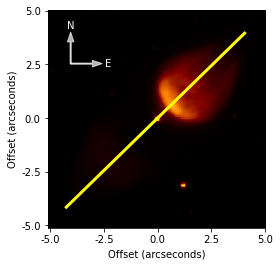

In [18]:
plt.imshow(data[980 - 50 : 980 + 50, 1459 - 50 : 1459 + 50], cmap = 'afmhot', origin = 'lower')
plt.plot([8, 90], [9, 89], color = 'yellow', linewidth = 3)
plt.xticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
plt.yticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
plt.xlabel("Offset (arcseconds)")
plt.ylabel("Offset (arcseconds)")

arrow_length = 10  # Length of the arrow lines

# Arrow for north (up)
plt.arrow(10, 75, 0, arrow_length, color='white', width=0.5, head_width=3, alpha=0.7)
plt.text(10, 80 + arrow_length + 1, 'N', color='white', ha='center')

# Arrow for east (right)
plt.arrow(10, 75, arrow_length, 0, color='white', width=0.5, head_width=3, alpha=0.7)
plt.text(15 + arrow_length + 1, 75, 'E', color='white', va='center')


plt.savefig('HST M1-92.png', dpi = 100)

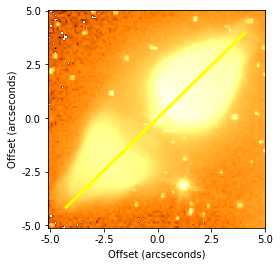

In [13]:
plt.imshow(data[980 - 50 : 980 + 50, 1459 - 50 : 1459 + 50], norm = c.LogNorm(), cmap = 'afmhot', origin = 'lower')
plt.plot([8, 90], [9, 89], color = 'yellow', linewidth = 3)
plt.xticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
plt.yticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
plt.xlabel("Offset (arcseconds)")
plt.ylabel("Offset (arcseconds)")
plt.savefig('HST M1-92-log.png', dpi = 100)

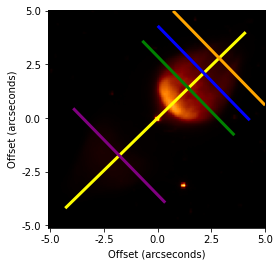

In [21]:
plt.imshow(data[980 - 50 : 980 + 50, 1459 - 50 : 1459 + 50], cmap = 'afmhot', origin = 'lower')
plt.plot([8, 90], [9, 89], color = 'yellow', linewidth = 3)
offset = 4
plt.plot([50 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 50 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], [50 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 50 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], color = 'orange', linewidth = 3)
offset = 3
plt.plot([50 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 50 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], [50 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 50 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], color = 'blue', linewidth = 3)
offset = 2
plt.plot([50 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 50 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], [50 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 50 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], color = 'green', linewidth = 3)
offset = -2.5
plt.plot([50 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 50 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], [50 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 50 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], color = 'purple', linewidth = 3)
plt.xticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
plt.yticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
plt.xlabel("Offset (arcseconds)")
plt.ylabel("Offset (arcseconds)")
plt.savefig('HST M1-92-with-profiles.png', dpi = 100)

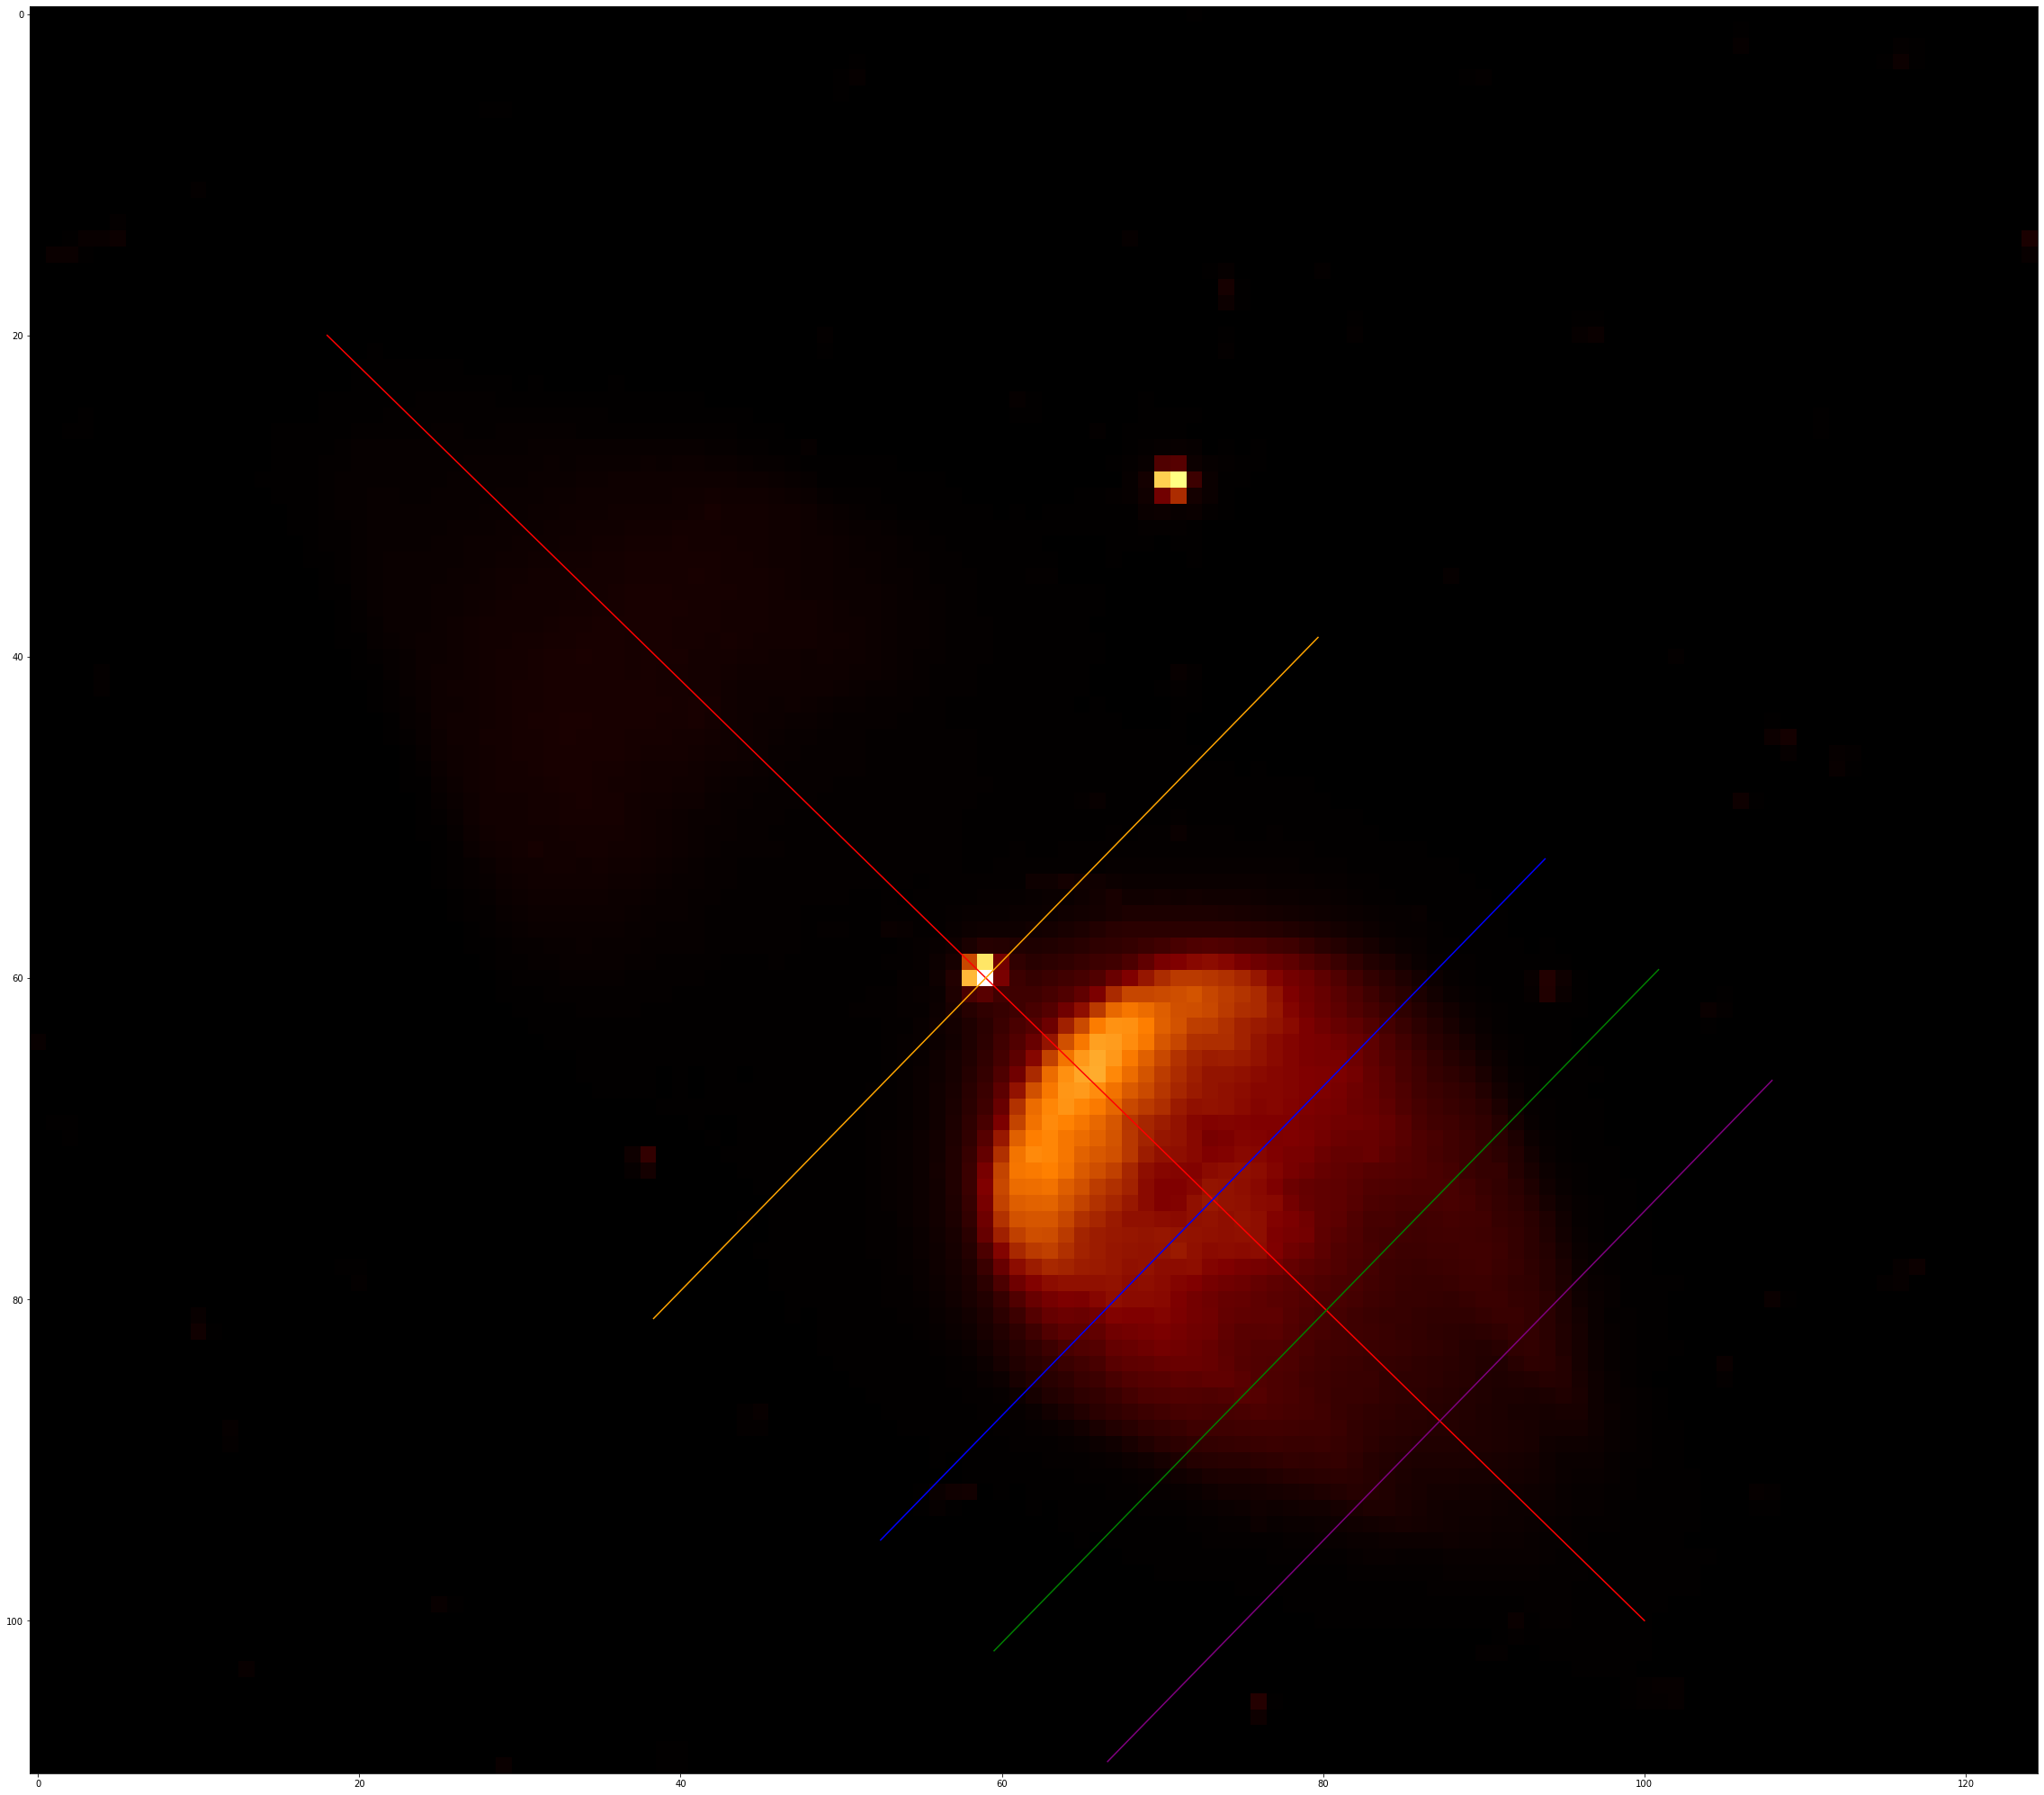

In [7]:
plt.imshow(data[920 : 1030, 1400 : 1525], cmap = 'afmhot')
plt.plot([18, 100], [20, 100], color = 'red')
offset = 0
plt.plot([59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], [60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], color = 'orange')
# plt.plot([100, 20], [18, 100], color = 'orange')
# plt.plot([100, 60], [48, 89], color = 'blue')
# plt.plot([100, 60], [68, 109], color = 'green')
# plt.plot([59, 59], [60, 61], color = 'green')
offset = 2
# plt.plot([59, 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], [60, 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], color = 'green')
# plt.plot([59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], [60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], color = 'blue')
plt.plot([59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], [60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], color = 'blue')
offset = 3
plt.plot([59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], [60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], color = 'green')
offset = 4
plt.plot([59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], [60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)), 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))], color = 'purple')
plt.show()

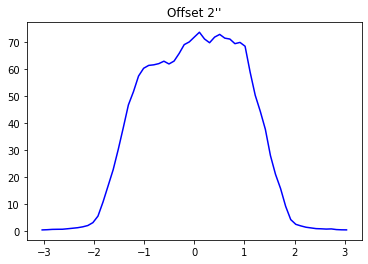

In [6]:
offset = 2
start_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
start_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
y_array = skimage.measure.profile_line(data[920 : 1030, 1400 : 1525], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * 0.1013, -(len(y_array) - 1) / 2 * 0.1013, len(y_array))
plt.plot(x_array, y_array, color = 'blue')
plt.title("Offset 2\'\'")
plt.show()

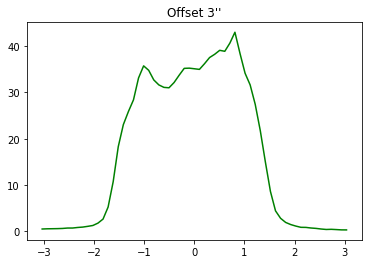

In [7]:
offset = 3
start_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
start_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
y_array = skimage.measure.profile_line(data[920 : 1030, 1400 : 1525], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * 0.1013, -(len(y_array) - 1) / 2 * 0.1013, len(y_array))
plt.plot(x_array, y_array, color = 'green')
plt.title("Offset 3\'\'")
plt.show()

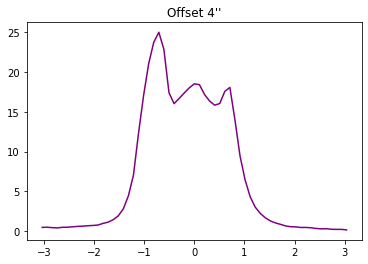

In [8]:
offset = 4
start_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
start_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
y_array = skimage.measure.profile_line(data[920 : 1030, 1400 : 1525], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * 0.1013, -(len(y_array) - 1) / 2 * 0.1013, len(y_array))
plt.plot(x_array, y_array, color = 'purple')
plt.title("Offset 4\'\'")
plt.show()

plt.imshow(data[978 : 982, 1457 : 1462], cmap = 'afmhot')
plt.plot([3 - 1, 5], [3 - 1, 5], color = 'red')

data[978 : 982, 1457 : 1462]

data[980, 1459]

x_array = np.linspace(-100 *  0.1013 * np.sqrt(2), 100 *  0.1013 * np.sqrt(2), 201)
y_array = [data[980, 1459]]
for i in range(1, 101):
    y_array.append(data[980 - i, 1459 - i])
    y_array.insert(0, data[980 + i, 1459 + i])

plt.plot(x_array, y_array, color = 'red')

data[920 + 75, 1400 + 75]

115


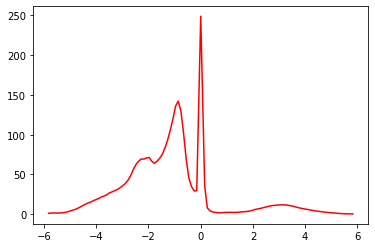

In [20]:
y_array = skimage.measure.profile_line(data[920 : 1030, 1400 : 1525], [18, 20], [100, 100], linewidth = 3)
x_array = np.linspace((len(y_array) - 1) / 2 *  0.1013, -(len(y_array) - 1) / 2 *  0.1013, len(y_array))
y_array = np.delete(y_array, 57)
y_array = np.delete(y_array, 57)
x_array = np.delete(x_array, 57)
x_array = np.delete(x_array, 57)
y_array = np.insert(y_array, 57, data[980, 1459])
x_array = np.insert(x_array, 57, 0)
plt.plot(x_array, y_array, color = 'red')
print(len(y_array))

In [28]:
max_y = np.amax(y_array)

In [48]:
x_array_2 = np.linspace(-100 *  0.1013 * np.sqrt(2) * np.cos(3 * np.pi / 180), 100 *  0.1013 * np.sqrt(2) * np.cos(3 * np.pi / 180), 201)
y_array_2 = [data[980, 1459]]
for i in range(1, 101):
    y_array_2.append(data[980 - i, 1459 - i])
    y_array_2.insert(0, data[980 + i, 1459 + i])

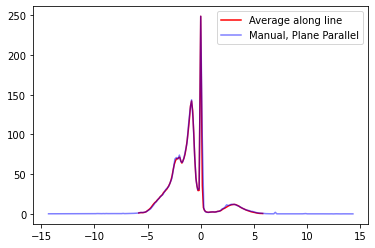

In [7]:
plt.plot(x_array, y_array, color = 'red', label = 'Average along line')
plt.plot(x_array_2, y_array_2, color = 'blue', alpha = 0.5, label = 'Manual, Plane Parallel')
plt.legend()

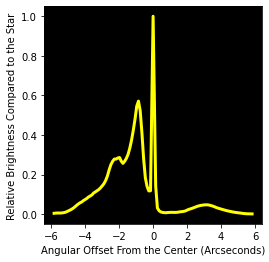

In [50]:
plt.plot(x_array, y_array / np.amax(y_array), color='yellow', linewidth = 3)
plt.gca().set_aspect(np.amax(x_array) * 2)
plt.xlabel('Angular Offset From the Center (Arcseconds)')
plt.ylabel('Relative Brightness Compared to the Star')
plt.xticks()
plt.yticks()

# Change background color to black
plt.gca().set_facecolor('black')

plt.savefig('HST M1-92-profile.png', dpi = 100)

y_array = skimage.measure.profile_line(data[920 : 1030, 1400 : 1525], [100, 48], [60, 89], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 *  0.1013, -(len(y_array) - 1) / 2 *  0.1013, len(y_array))
plt.plot(x_array, y_array, color = 'blue')

y_array = skimage.measure.profile_line(data[920 : 1030, 1400 : 1525], [100, 48], [60 - 440 / 39, 100], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 *  0.1013, -(len(y_array) - 1) / 2 *  0.1013, len(y_array))
plt.plot(x_array, y_array, color = 'blue')

y_array = skimage.measure.profile_line(data[920 : 1030, 1400 : 1525], [100, 68], [60, 109], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 *  0.1013, -(len(y_array) - 1) / 2 *  0.1013, len(y_array))
plt.plot(x_array, y_array, color = 'green')

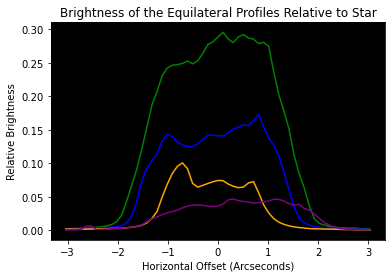

In [33]:
offset = 2
start_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
start_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
y_array = skimage.measure.profile_line(data[920 : 1030, 1400 : 1525], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * 0.1013, -(len(y_array) - 1) / 2 * 0.1013, len(y_array))
plt.plot(x_array, y_array / max_y, color = 'green')
offset = 3
start_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
start_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
y_array = skimage.measure.profile_line(data[920 : 1030, 1400 : 1525], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * 0.1013, -(len(y_array) - 1) / 2 * 0.1013, len(y_array))
plt.plot(x_array, y_array / max_y, color = 'blue')
offset = 4
start_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
start_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
y_array = skimage.measure.profile_line(data[920 : 1030, 1400 : 1525], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * 0.1013, -(len(y_array) - 1) / 2 * 0.1013, len(y_array))
plt.plot(x_array, y_array / max_y, color = 'orange')
offset = -2.5
start_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
start_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
y_array = skimage.measure.profile_line(data[920 : 1030, 1400 : 1525], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * 0.1013, -(len(y_array) - 1) / 2 * 0.1013, len(y_array))
plt.plot(x_array, y_array / max_y, color = 'purple')
plt.title("Brightness of the Equilateral Profiles Relative to Star")
plt.ylabel("Relative Brightness")
plt.xlabel("Horizontal Offset (Arcseconds)")
plt.gca().set_facecolor('black')
plt.savefig('HST M1-92-horizontal-profiles.png', dpi = 100)

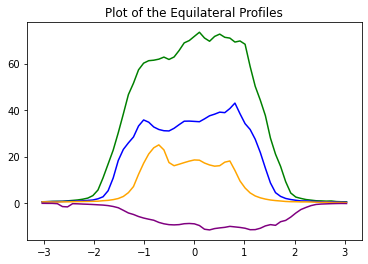

In [24]:
offset = 2
start_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
start_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
y_array = skimage.measure.profile_line(data[920 : 1030, 1400 : 1525], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * 0.1013, -(len(y_array) - 1) / 2 * 0.1013, len(y_array))
plt.plot(x_array, y_array, color = 'green')
offset = 3
start_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
start_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
y_array = skimage.measure.profile_line(data[920 : 1030, 1400 : 1525], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * 0.1013, -(len(y_array) - 1) / 2 * 0.1013, len(y_array))
plt.plot(x_array, y_array, color = 'blue')
offset = 4
start_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
start_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
y_array = skimage.measure.profile_line(data[920 : 1030, 1400 : 1525], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * 0.1013, -(len(y_array) - 1) / 2 * 0.1013, len(y_array))
plt.plot(x_array, y_array, color = 'orange')
offset = -2.5
start_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_x = 59 + 41 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 40 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
start_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) - 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
end_y = 60 + 40 * offset / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2)) + 41 * 3 / (0.1013 * np.sqrt(40 ** 2 + 41 ** 2))
y_array = -skimage.measure.profile_line(data[920 : 1030, 1400 : 1525], [start_x, start_y], [end_x, end_y], linewidth = 1)
x_array = np.linspace((len(y_array) - 1) / 2 * 0.1013, -(len(y_array) - 1) / 2 * 0.1013, len(y_array))
plt.plot(x_array, y_array, color = 'purple')
plt.title("Plot of the Equilateral Profiles")
plt.show()

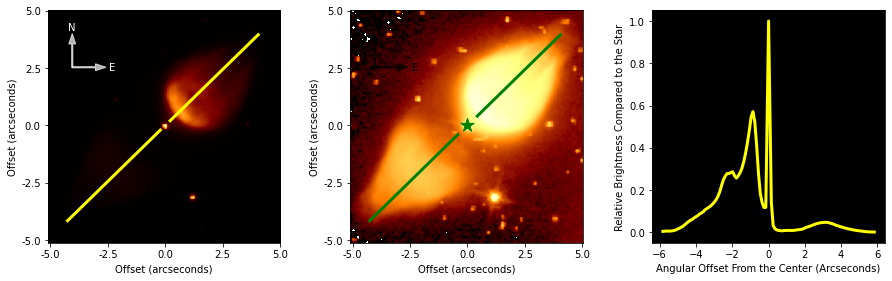

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(data[980 - 50 : 980 + 50, 1459 - 50 : 1459 + 50], cmap = 'afmhot', origin = 'lower')
axes[0].plot([8, 50 - 2.1], [9, 50 - 2], color = 'yellow', linewidth = 3)
axes[0].plot([50 + 2.1, 90], [50 + 2, 89], color = 'yellow', linewidth = 3)
axes[0].set_xticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
axes[0].set_yticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
axes[0].set_xlabel("Offset (arcseconds)")
axes[0].set_ylabel("Offset (arcseconds)")

arrow_length = 10  # Length of the arrow lines

# Arrow for north (up)
axes[0].arrow(10, 75, 0, arrow_length, color = 'white', width = 0.5, head_width = 3, alpha = 0.7)
axes[0].text(10, 80 + arrow_length + 1, 'N', color = 'white', ha = 'center')

# Arrow for east (right)
axes[0].arrow(10, 75, arrow_length, 0, color = 'white', width = 0.5, head_width = 3, alpha = 0.7)
axes[0].text(15 + arrow_length + 1, 75, 'E', color = 'white', va = 'center')

axes[1].imshow(data[980 - 50 : 980 + 50, 1459 - 50 : 1459 + 50], norm = c.LogNorm(vmin = data.max() / 10000), cmap = 'afmhot', origin = 'lower')
axes[1].plot([8, 50 - 4.2], [9, 50 - 4], color = 'green', linewidth = 3)
axes[1].plot([50 + 4.2, 90], [50 + 4, 89], color = 'green', linewidth = 3)
axes[1].set_xticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
axes[1].set_yticks(ticks = np.linspace(50 - 49.358, 50 + 49.358, 5), labels = np.around(np.linspace(-5, 5, 5), 2))
axes[1].set_xlabel("Offset (arcseconds)")
axes[1].set_ylabel("Offset (arcseconds)")

axes[1].arrow(10, 75, 0, arrow_length, color = 'black', width = 0.5, head_width = 3, alpha = 0.7)
axes[1].text(10, 80 + arrow_length + 1, 'N', color = 'black', ha = 'center')

# Arrow for east (right)
axes[1].arrow(10, 75, arrow_length, 0, color = 'black', width = 0.5, head_width = 3, alpha = 0.7)
axes[1].text(15 + arrow_length + 1, 75, 'E', color = 'black', va = 'center')

axes[1].scatter(50, 50, marker = '*', color = 'green', s = 200)

axes[2].plot(x_array, y_array / np.amax(y_array), color = 'yellow', linewidth = 3)
axes[2].set_aspect(np.amax(x_array) * 2)
axes[2].set_xlabel('Angular Offset From the Center (Arcseconds)')
axes[2].set_ylabel('Relative Brightness Compared to the Star')

# Change background color to black
axes[2].set_facecolor('black')

plt.subplots_adjust(wspace = 0.3)

# Save the combined plot
plt.savefig('HST M1-92-combined', dpi = 100)

In [13]:
# END